In [128]:
import pandas as pd
import numpy as np
import sklearn

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import pickle

In [101]:
dataset = pd.read_parquet('dataset.parquet')

In [102]:
dataset

,sign,signer_id,youtube_url,frame,xmin,ymin,xmax,ymax,path_landmarks
0,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,329,407,103,656,344,landmark_files/Anh0MnIoA4w/329.parquet
1,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,330,407,103,656,344,landmark_files/Anh0MnIoA4w/330.parquet
2,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,331,407,102,656,343,landmark_files/Anh0MnIoA4w/331.parquet
3,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,332,407,102,656,343,landmark_files/Anh0MnIoA4w/332.parquet
4,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,333,407,102,656,343,landmark_files/Anh0MnIoA4w/333.parquet
...,...,...,...,...,...,...,...,...,...
22871,Y,4oLj2Bxc3vM,https://www.youtube.com/watch?v=4oLj2Bxc3vM,5671,415,177,722,453,landmark_files/4oLj2Bxc3vM/5671.parquet
22872,Y,4oLj2Bxc3vM,https://www.youtube.com/watch?v=4oLj2Bxc3vM,5672,415,177,722,453,landmark_files/4oLj2Bxc3vM/5672.parquet
22873,Y,4oLj2Bxc3vM,https://www.youtube.com/watch?v=4oLj2Bxc3vM,5673,415,177,722,453,landmark_files/4oLj2Bxc3vM/5673.parquet
22874,Y,4oLj2Bxc3vM,https://www.youtube.com/watch?v=4oLj2Bxc3vM,5674,415,177,722,453,landmark_files/4oLj2Bxc3vM/5674.parquet


In [103]:
pd.read_parquet('landmark_files/Anh0MnIoA4w/329.parquet')

,landmark_index,x,y,z
0,0,0.014507,0.086849,0.007559
1,1,-0.015449,0.067023,0.002611
2,2,-0.032912,0.039963,-0.000265
3,3,-0.046170,0.006634,-0.006198
4,4,-0.053118,-0.025896,-0.004696
5,5,-0.022696,-0.002957,0.004437
6,6,-0.029657,-0.016944,-0.014669
7,7,-0.029028,0.000255,-0.024632
8,8,-0.024862,0.022166,-0.013348
9,9,-0.002405,-0.004438,0.002689


In [104]:
def load_landmarks(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    data = data.values.flatten()
    return data.astype(np.float32)

In [105]:
dataset['landmarks'] = dataset['path_landmarks'].apply(load_landmarks)

In [106]:
dataset.head()

,sign,signer_id,youtube_url,frame,xmin,ymin,xmax,ymax,path_landmarks,landmarks
0,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,329,407,103,656,344,landmark_files/Anh0MnIoA4w/329.parquet,"[0.01450691, 0.086849034, 0.0075590964, -0.015..."
1,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,330,407,103,656,344,landmark_files/Anh0MnIoA4w/330.parquet,"[0.018444331, 0.08901835, 0.009912109, -0.0130..."
2,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,331,407,102,656,343,landmark_files/Anh0MnIoA4w/331.parquet,"[0.018782917, 0.088051066, 0.0075024227, -0.01..."
3,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,332,407,102,656,343,landmark_files/Anh0MnIoA4w/332.parquet,"[0.0188533, 0.08747366, 0.0070892186, -0.01282..."
4,A,Anh0MnIoA4w,https://www.youtube.com/watch?v=Anh0MnIoA4w,333,407,102,656,343,landmark_files/Anh0MnIoA4w/333.parquet,"[0.01866625, 0.087914206, 0.0066496218, -0.013..."


# <span style="color:purple"> SPLIT DATASET </span>

In [107]:
signers = dataset['signer_id'].unique()
signers

array(['Anh0MnIoA4w', 'maGTKXCNaj8', '0sOL39QTT-I', 'fYaXJXf60gU',
       'kK6ZlukniGo', '6wqM0O-tpmQ', 'EZxkymw426U', 'sKX2e9YucPM',
       'W9NSh0HAtsk', 'ZeSJQtD3rV0', 'iE0S4FTdVyk', 'ECn7Sg6Grww',
       'kvJcjPV9xXs', 'C5x8Tf2HowA', 'Nj_oMYopmTc', 'UUZgF4ac_LY',
       '4oLj2Bxc3vM'], dtype=object)

In [108]:
len(signers)

17

In [109]:
signers_train = signers[:14]
signers_test = signers[14:]

In [110]:
dataset_train = dataset[dataset['signer_id'].isin(signers_train)]
dataset_test = dataset[dataset['signer_id'].isin(signers_test)]

In [111]:
labels = dataset['sign'].unique()
labels

array(['A', 'B', 'C', 'O', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'P',
       'Q', 'R', 'V', 'S', 'T', 'U', 'W', 'Y'], dtype=object)

In [112]:
le = preprocessing.LabelEncoder()
le.fit(labels)

LabelEncoder()

In [113]:
X_train = np.array(dataset_train['landmarks'].tolist())
Y_train = np.array(le.transform(dataset_train['sign']))

In [114]:
X_test = np.array(dataset_test['landmarks'].tolist())
Y_test = np.array(le.transform(dataset_test['sign']))

In [115]:
X_train.shape, X_test.shape

((18324, 63), (4552, 63))

# <span style="color:purple"> TRAIN MODEL </span>

In [116]:
model = SVC(decision_function_shape='ovo')

In [117]:
model.fit(X_train, Y_train)

SVC(decision_function_shape='ovo')

# <span style="color:purple"> SCORE MODEL </span>

In [118]:
predictions = model.predict(X_test)

In [119]:
print(classification_report(Y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       292
           B       0.98      1.00      0.99       192
           C       0.90      0.97      0.94       272
           O       0.92      0.99      0.95       249
           D       1.00      0.87      0.93       439
           E       0.99      0.85      0.91       706
           F       0.99      1.00      1.00       164
           G       1.00      1.00      1.00       217
           I       1.00      0.99      1.00       116
           L       0.71      0.99      0.83       181
           M       0.99      0.58      0.74       212
           N       0.90      0.96      0.93       118
           P       0.94      1.00      0.97       268
           Q       0.99      1.00      1.00       112
           R       0.75      0.95      0.84       125
           V       1.00      1.00      1.00       181
           S       0.60      0.99      0.75       164
           T       0.94    

<Axes: >

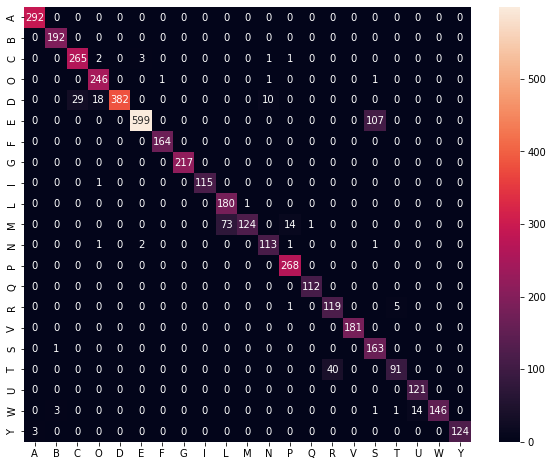

In [125]:
cm = confusion_matrix(Y_test, predictions)
df_cm = pd.DataFrame(np.array(cm), columns=labels, index=labels)
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt=".0f")

# <span style="color:purple"> CONVERT TO ONNX </span>

In [129]:
initial_type = [ 
    ( 'input_landmarks' , FloatTensorType( [None,63] ) ) 
]

converted_model = convert_sklearn(model, initial_types=initial_type)

with open( "alphabet_model.onnx", "wb" ) as f:
        f.write( converted_model.SerializeToString() )